<a href="https://colab.research.google.com/github/bharaniy/-AIChatBasedSurveySystem/blob/master/Sentiment_Analysis_for_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPool1D, Embedding, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/reviews.csv')
dataset.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [0]:
#Y=dataset.iloc[:,0]

In [0]:
#X=dataset.iloc[:,5]

In [0]:
X = dataset.iloc[:, 1]
Y = dataset.iloc[:,2]

print(len(X), len(Y))
print(set(Y))

107018 107018
{1, 2, 3, 4, 5}


In [0]:
Y = Y.map(lambda y : 2 if int(y)> 3 else 1 if int(y)==3 else 0)
Y = np_utils.to_categorical(Y)
print(Y[0])

[0. 0. 1.]


In [0]:

print(max(len(s) for s in X))
print(min(len(s)for s in X))

7766
1


In [0]:
sorted_X = sorted(len(s) for s in X)
print(sorted_X[len(sorted_X) // 2])


90


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

word2index = tokenizer.word_index
print(len(word2index))

35397


In [0]:
print(sequences[1])

[8, 77, 9, 11, 80, 3, 30, 1261, 149, 238, 31, 8, 77, 78, 217, 121, 5, 33, 7, 104, 464, 79]


In [0]:
sequences = pad_sequences(sequences, maxlen=90)
print(sequences.shape)

(107018, 90)


In [0]:
sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    8,   77,    9,   11,   80,    3,   30, 1261,  149,
        238,   31,    8,   77,   78,  217,  121,    5,   33,    7,  104,
        464,   79], dtype=int32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
X_train, X_test, Y_train, Y_test = train_test_split(sequences, Y, test_size=0.1, random_state=0)

max_len = 90
vector_length = 100
input_dim = len(word2index)
batch_size = 32
epochs = 5
lstm_out=196

model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=vector_length, input_length=max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
save_best = ModelCheckpoint('coursera.hdf', save_best_only=True, monitor='val_loss', mode='min')

result = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_split=0.1, verbose=1, callbacks=[save_best])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 90, 100)           3539700   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 90, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               232848    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 591       
Total params: 3,773,139
Trainable params: 3,773,139
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 86684 samples, 

10702/10702 [==============================] - 17s 2ms/step
0.11580715556107733 0.954837122000928


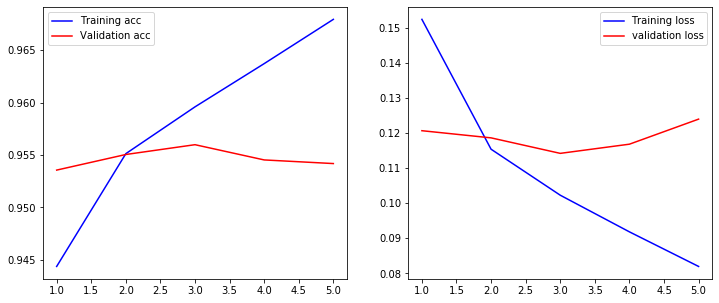

In [0]:
model.load_weights('/content/coursera.hdf')
eval_ = model.evaluate(X_test, Y_test)
print(eval_[0], eval_[1]) # loss / accuracy

def plot_model(result):
    acc = result.history['acc']
    val_acc = result.history['val_acc']
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    x = range(1, len(acc)+1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label= 'Validation acc')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='validation loss')
    plt.legend()
    
plot_model(result)


# Test Loss : 0.12343048582793707

# Test Accuracy : 0.9523765214512981



In [0]:
import pickle

pickle.dump(model, open('/content/model.pkl', 'wb'))
config = {'tokenizer': {'tokenizer': tokenizer,  'maxlen':90}}
pickle.dump(config, file = open('/content/config.pkl', 'wb'))

In [0]:

import pickle
import numpy as np
import keras
from keras.preprocessing.sequence import pad_sequences

model1 = pickle.load(open('/content/model.pkl','rb'))
config = pickle.load(open('/content/config.pkl', 'rb'))

In [0]:
def predict_sentiment(text, model, config):
    text = [text] if type(text) == np.str else text
    tokenizer = config['tokenizer']['tokenizer']
    text = tokenizer.texts_to_sequences(text)
    text = pad_sequences(text, maxlen = config['tokenizer']['maxlen'])
    sentiment = model.predict(text,batch_size=1,verbose = 0)[0]
    argmax_sent = np.argmax(sentiment)
    if  argmax_sent == 2:
        sentiment_text='Positive'
    elif argmax_sent == 1:
        sentiment_text="Neutral"
    elif argmax_sent == 0:
         sentiment_text = 'Negative' 
    sentiment_score = sentiment[argmax_sent]
    return((sentiment_text, sentiment_score))

In [0]:
text = ["I can't love someone more than you"]
predict_sentiment(text, model1, config)

('Positive', 0.925753)

In [0]:
import requests
import json
url='http://127.0.0.1:5000/'
data={'text':'my life is good'}
data=json.dumps(data)
import time

page = ''
while page == '':
    try:
        send_request=requests.post(url,data)
        break
    except:
        print("Connection refused by the server..")
        print("Let me sleep for 5 seconds")
        print("ZZzzzz...")
        time.sleep(5)
        print("Was a nice sleep, now let me continue...")
        continue

print(send_request)

Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...


KeyboardInterrupt: ignored

In [0]:
from flask import Flask, request, jsonify
from flask_restful import reqparse, abort, Api, Resource
import pickle
import numpy as np
import sys, os
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
#from tensorflow.python.keras import backend as k
from keras.models import load_model
path_model = '/content/model.pkl'
path_config = '/content/config.pkl'


"""load ML model and configuration"""
#model = tf.keras.models.load_model(path_model)
model = pickle.load(open(path_model, 'rb'))
#graph = tf.get_default_graph()
config = pickle.load(open(path_config, 'rb'))


def prepare_datapoint(text):
    text = [text] if type(text) == np.str else text
    tokenizer = config['tokenizer']['tokenizer']
    text = tokenizer.texts_to_sequences(text)
    text = pad_sequences(text, maxlen=config['tokenizer']['maxlen'])
    return (text)


## helper function
def predict_sentiment(text):
    ret = dict()
    text = prepare_datapoint(text)
    #global graph
    #with graph.as_default():
    sentiment = model.predict(text,verbose = 0)[0]
    argmax_sent = np.argmax(sentiment)
    if argmax_sent == 2:
        ret['sentiment'] = 'Positive'
    elif argmax_sent == 1:
        ret['sentiment'] = "Neutral"
    elif argmax_sent == 0:
        ret['sentiment'] = 'Negative'
    ret['score'] = str(sentiment[argmax_sent])
    return (ret)


## API
app = Flask(__name__)
api = Api(app)

parser = reqparse.RequestParser()
parser.add_argument('query')

class PredictSentiment(Resource):
    #def get(self):
        #return ('Hello, World!')

    def put(self):
        #text = request.form['data']
        args = parser.parse_args()
        text = args['query']
        ret = predict_sentiment(text)
        return (jsonify(ret))


api.add_resource(PredictSentiment, '/')

if __name__ == '__main__':
   app.run(debug=True)